# Pseudo-Nyquist Arguments

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.style.use('seaborn-whitegrid')

## LINEAR data

In [2]:
data = pd.read_csv('LINEAR_11375941.csv')
data.head()

,t,mag,magerr
0,52650.434545,15.969,0.035
1,52650.448450,16.036,0.039
2,52650.462420,15.990,0.035
3,52650.476485,16.027,0.035
4,52650.490443,15.675,0.030


In [3]:
from astropy.stats import LombScargle
ls = LombScargle(data.t, data.mag, data.magerr)
frequency, power = ls.autopower(nyquist_factor=500,
                                minimum_frequency=0.2)

In [4]:
f0 = frequency[np.argmax(power)]
print("period: {0:.2f} hours".format(24. / f0))

period: 2.58 hours


In [5]:
delta_t = data.t.values[1:] - data.t.values[:-1]
np.min(delta_t) * 24. * 60. * 60.

9.6768001327291131

In [6]:
np.mean(delta_t)

7.0317109856631133

## Simulated Data

In [7]:
N = 100
dt = 10
f0 = 100

#rng = np.random.RandomState(5434)
rng = np.random.RandomState(42)
t = 100 + dt * np.arange(N) + 3 * rng.randn(N)
y = 10 + 5 * np.sin(2 * np.pi * f0 * t) + rng.randn(N)

i = np.argsort(t)
t, y = t[i], y[i]

In [8]:
delta_t = t[1:] - t[:-1]
print("mean:", 0.5 / np.mean(delta_t))
print("harmonic mean:", np.mean(0.5 / delta_t))
print("min separation:", 0.5 / np.min(delta_t))

mean: 0.0501110493177
harmonic mean: 0.0599969202032
min separation: 0.195835266968


In [9]:
print(delta_t.min())

2.55316627971


In [10]:
ls = LombScargle(t, y)
freq, P = ls.autopower(minimum_frequency=1E-2, maximum_frequency=200)

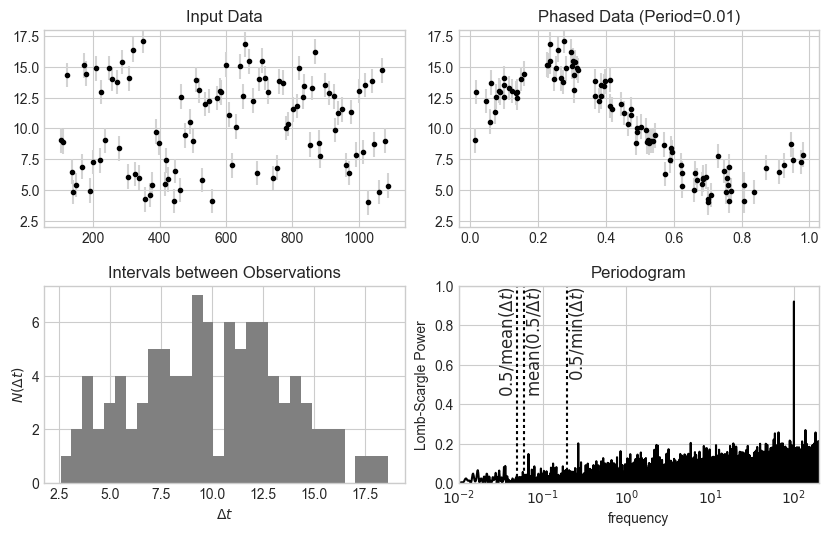

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(10, 6))
fig.subplots_adjust(wspace=0.15, hspace=0.3)

# Plot the data
ax[0, 0].errorbar(t, y, 1.0, fmt='.k', ecolor='lightgray', capsize=0);
ax[0, 0].set(title='Input Data',
             ylim=(2, 18))

# Plot the phased data
ax[0, 1].errorbar((t * f0) % 1, y, 1.0, fmt='.k', ecolor='lightgray', capsize=0);
ax[0, 1].set(title='Phased Data (Period=0.01)',
             ylim=(2, 18))

# Plot the histogram of intervals
ax[1, 0].hist(delta_t, 30, fc='gray')
ax[1, 0].set(xlabel=r'$\Delta t$',
             ylabel=r'$N(\Delta t)$',
             title='Intervals between Observations')

ax[1, 1].semilogx(freq, P, '-k', rasterized=True)

ax[1, 1].axvline(0.5 / delta_t.mean(), linestyle='dotted', color='black')
ax[1, 1].text(0.5 / delta_t.mean(), 1.0, r'$0.5 / {\rm mean}(\Delta t)$',
              ha='right', va='top', rotation=90, size=12)

ax[1, 1].axvline(np.mean(0.5 / delta_t), linestyle='dotted', color='black')
ax[1, 1].text(np.mean(0.5 / delta_t), 1.0, r'${\rm mean}(0.5 / \Delta t)$',
              ha='left', va='top', rotation=90, size=12)

ax[1, 1].axvline(0.5 / np.min(delta_t), linestyle='dotted', color='black')
ax[1, 1].text(0.5 / np.min(delta_t), 1.0, r'$0.5 / \min(\Delta t)$',
              ha='left', va='top', rotation=90, size=12)

ax[1, 1].set(xlim=(1E-2, 200),
             ylim=(0, 1),
             xlabel='frequency',
             ylabel='Lomb-Scargle Power',
             title='Periodogram');


fig.savefig('fig12_pseudo_nyquist.pdf')

## Simulated Data following Eyer99

In [12]:
rng = np.random.RandomState(38902)

N = 100
f0 = 10
t = 100 * rng.rand(N)
t = t.round(2)
y = 10 + 5 * np.sin(2 * np.pi * f0 * t) + rng.randn(N)

freq,  power = LombScargle(t, y, 0.1).autopower(maximum_frequency=300)

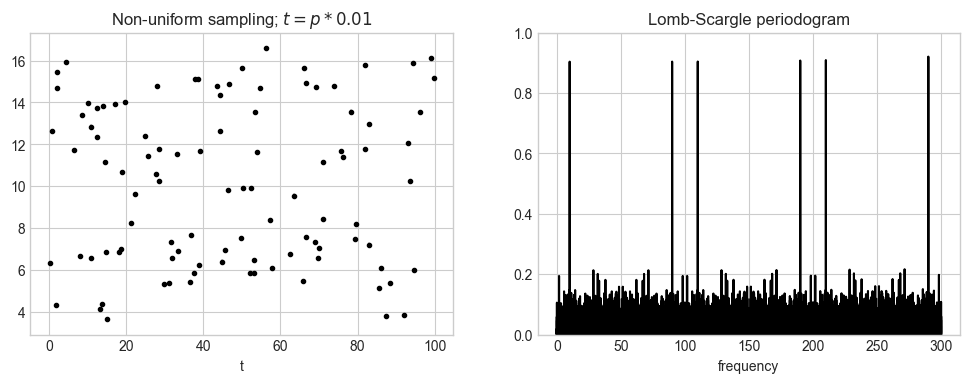

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].errorbar(t, y, 0.1, fmt='.k', ecolor='lightgray', capsize=0);
ax[1].plot(freq, power, '-k', rasterized=True)
ax[1].set_ylim(0, 1);

ax[0].set(title='Non-uniform sampling; $t = p * 0.01$',
          xlabel='t')
ax[1].set(title='Lomb-Scargle periodogram',
          xlabel='frequency')

fig.savefig('fig13_nyquist_eyer99.pdf');